<a href="https://colab.research.google.com/github/sanjil2/ITEM-BASKET-ANALYSIS-USING-APRIORI/blob/main/Copy_of_SIN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>ITEM-BASKET Analysis Using Apriori Dataset-2</h2>

---



In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


We are using the new Approach so that we get a proper representation of frequent itemset and association rules for representing real life data with thousand of transactions.  

In [2]:
#importing packages
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
 #importing the data from real E-commerse dataset.
df=pd.read_excel('/content/Online Retail.xlsx') 

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [6]:
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [7]:
#using the germany dataset
df1=df[df.Country=='Germany']

In [8]:
df1.value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  Country
553731     23208      LUNCH BAG VINTAGE LEAF DESIGN         10       2011-05-19 08:26:00  1.65       12481.0     Germany    2
542106     20676      RED RETROSPOT BOWL                    24       2011-01-25 13:37:00  1.25       12709.0     Germany    2
538174     22326      ROUND SNACK BOXES SET OF4 WOODLAND    12       2010-12-10 09:35:00  2.95       12471.0     Germany    2
576607     22086      PAPER CHAIN KIT 50'S CHRISTMAS        6        2011-11-15 15:42:00  2.95       12474.0     Germany    2
555162     22704      WRAP RED APPLES                       25       2011-06-01 10:15:00  0.42       12473.0     Germany    2
                                                                                                                           ..
554106     22531      MAGIC DRAWING SLATE CIRCUS PARADE     24       2011-05-22 14:05:00  0.42       12710.0     Germany   

In [9]:
df1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany
1114,536527,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1115,536527,47421,ASSORTED COLOUR LIZARD SUCTION HOOK,24,2010-12-01 13:04:00,0.42,12662.0,Germany
1116,536527,20712,JUMBO BAG WOODLAND ANIMALS,10,2010-12-01 13:04:00,1.95,12662.0,Germany
1117,536527,20713,JUMBO BAG OWLS,10,2010-12-01 13:04:00,1.95,12662.0,Germany
1118,536527,22837,HOT WATER BOTTLE BABUSHKA,4,2010-12-01 13:04:00,4.65,12662.0,Germany


In [10]:
#strip out the extra spaces presened in the description for the dataset
df1['Description'].str.strip()

1109                  SET OF 6 T-LIGHTS SANTA
1110      ROTATING SILVER ANGELS T-LIGHT HLDR
1111       MULTI COLOUR SILVER T-LIGHT HOLDER
1112            5 HOOK HANGER MAGIC TOADSTOOL
1113               3 HOOK HANGER MAGIC GARDEN
                         ...                 
541801           SET OF 4 PANTRY JELLY MOULDS
541802       PACK OF 20 NAPKINS PANTRY DESIGN
541803          PACK OF 20 NAPKINS RED APPLES
541804       JINGLE BELL HEART ANTIQUE SILVER
541805             RIBBON REEL MAKING SNOWMEN
Name: Description, Length: 9495, dtype: object

In [11]:
df1['Description']=df1['Description'].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df2=df1['Description'].str.strip()

In [13]:
df1['Description']=df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2


1109                  SET OF 6 T-LIGHTS SANTA
1110      ROTATING SILVER ANGELS T-LIGHT HLDR
1111       MULTI COLOUR SILVER T-LIGHT HOLDER
1112            5 HOOK HANGER MAGIC TOADSTOOL
1113               3 HOOK HANGER MAGIC GARDEN
                         ...                 
541801           SET OF 4 PANTRY JELLY MOULDS
541802       PACK OF 20 NAPKINS PANTRY DESIGN
541803          PACK OF 20 NAPKINS RED APPLES
541804       JINGLE BELL HEART ANTIQUE SILVER
541805             RIBBON REEL MAKING SNOWMEN
Name: Description, Length: 9495, dtype: object

In [15]:
#we can also remove some negative quantities.
df1 = df1[df1.Quantity >0]

In [16]:
df1[df1.Country == 'Germany'].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany
1114,536527,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1115,536527,47421,ASSORTED COLOUR LIZARD SUCTION HOOK,24,2010-12-01 13:04:00,0.42,12662.0,Germany
1116,536527,20712,JUMBO BAG WOODLAND ANIMALS,10,2010-12-01 13:04:00,1.95,12662.0,Germany
1117,536527,20713,JUMBO BAG OWLS,10,2010-12-01 13:04:00,1.95,12662.0,Germany
1118,536527,22837,HOT WATER BOTTLE BABUSHKA,4,2010-12-01 13:04:00,4.65,12662.0,Germany


In [17]:
# we need to fill zeros in any NAN Value if mentioned
basket = pd.pivot_table(data=df1,index='InvoiceNo',columns='Description',values='Quantity', \
                        aggfunc='sum',fill_value=0)

In [18]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#this to check correctness after binning it to 1 at below code..
basket['MULTI COLOUR SILVER T-LIGHT HOLDER'].head(10)

InvoiceNo
536527    12
536840     0
536861     0
536967     0
536983     0
537197     0
537198     0
537201     0
537212     0
537250     0
Name: MULTI COLOUR SILVER T-LIGHT HOLDER, dtype: int64

In [20]:
#we can now use binary to represent if a person has taken the item or not
def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [21]:
basket_sets = basket.applymap(convert_into_binary)

In [22]:
basket_sets['MULTI COLOUR SILVER T-LIGHT HOLDER'].head()

InvoiceNo
536527    1
536840    0
536861    0
536967    0
536983    0
Name: MULTI COLOUR SILVER T-LIGHT HOLDER, dtype: int64

We are now getting a zero or 1 for the quantity that is being purchased



In [23]:
basket_sets['MULTI COLOUR SILVER T-LIGHT HOLDER']

InvoiceNo
536527    1
536840    0
536861    0
536967    0
536983    0
         ..
581266    0
581494    0
581570    0
581574    0
581578    0
Name: MULTI COLOUR SILVER T-LIGHT HOLDER, Length: 457, dtype: int64

In [24]:
#remove postage item as it is just a seal which almost all transaction contain. 
basket_sets.drop(columns=['POSTAGE'],inplace=True)

*We* now try to use the apriori functions for the solution. We call apriori function and pass minimum support here we are passing 7%. means 7 times in total number of transaction that item was present.

In [25]:
frequent_itemsets = apriori(basket_sets, min_support=0.06, use_colnames=True)

In [26]:
#it will generate frequent itemsets using two step approch
frequent_itemsets

,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.065646,(CHARLOTTE BAG APPLES DESIGN)
3,0.061269,(COFFEE MUG APPLES DESIGN)
4,0.063457,(FAWN BLUE HOT WATER BOTTLE)
5,0.072210,(GUMBALL COAT RACK)
6,0.063457,(JAM JAR WITH PINK LID)
7,0.091904,(JAM MAKING SET PRINTED)
8,0.061269,(JUMBO BAG APPLES)
9,0.078775,(JUMBO BAG RED RETROSPOT)


In [27]:
# we have association rules which need to put on frequent itemset. here we are setting based on lift and has minimum lift as 1
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.137856,0.115974,0.067834,0.492063,4.242887,0.051846,1.740427
2,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.137856,0.107221,0.061269,0.444444,4.145125,0.046488,1.607002
3,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
4,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006


In [28]:
basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

112

In [29]:
basket_sets['PLASTERS IN TIN WOODLAND ANIMALS'].sum()

63

In [30]:
# We can also sort based on confidance and lift.
rules_mlxtend[ (rules_mlxtend['lift'] >= 2) & (rules_mlxtend['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
3,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
4,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006
6,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
7,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
9,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427
11,(WOODLAND CHARLOTTE BAG),(ROUND SNACK BOXES SET OF4 WOODLAND),0.126915,0.245077,0.063457,0.500000,2.040179,0.032354,1.509847


There will always be incoming and outgoing edges in this graph. The antecedants will be represented by the incoming edge(s), and the stub (arrow) will be next to the node.

In [31]:
rules=rules_mlxtend

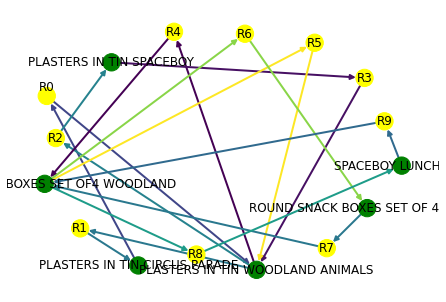

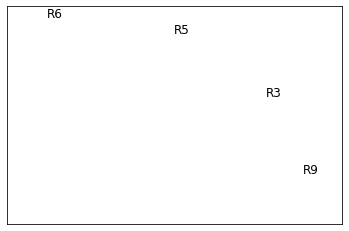

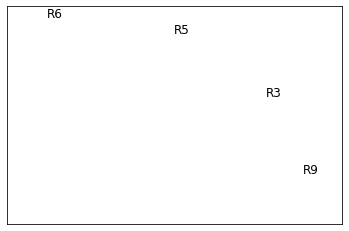

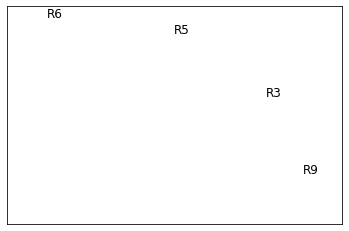

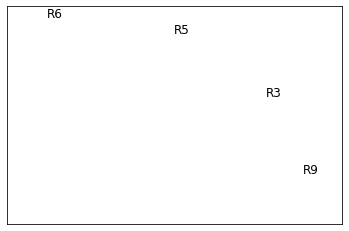

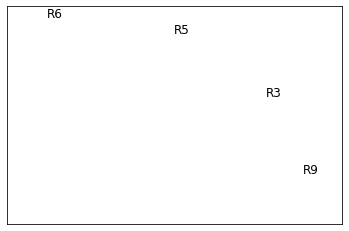

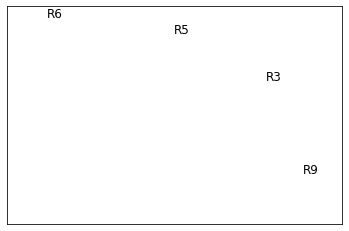

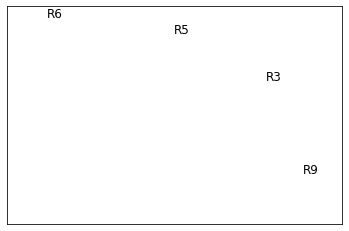

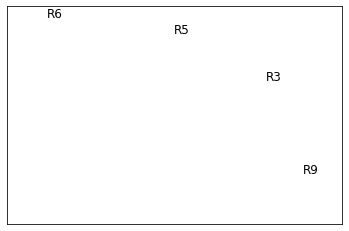

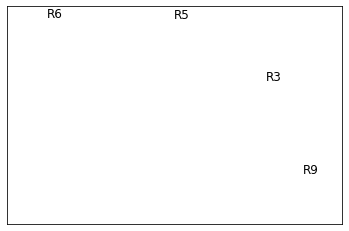

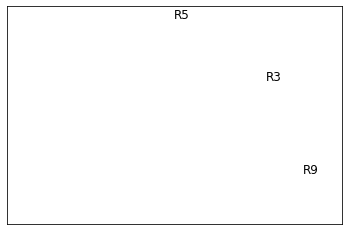

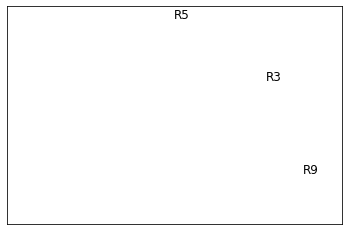

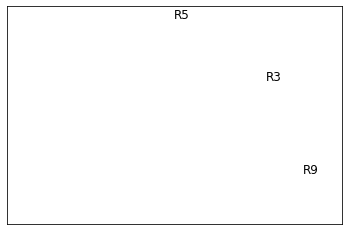

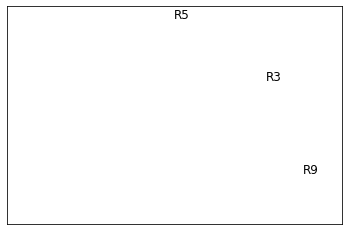

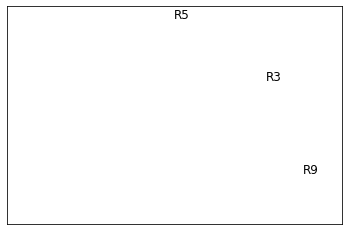

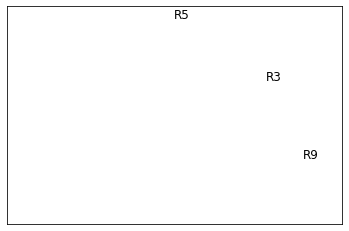

In [32]:
import networkx as nx
import matplotlib.pyplot as plt  

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
      found_a_string = False
      for item in strs: 
        if node==item:
          found_a_string = True
      if found_a_string:
        color_map.append('yellow')
      else:
        color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]


    # nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False) 
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos,node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)           
    

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos)
        plt.show()
      
      
      
draw_graph (rules_mlxtend,10) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


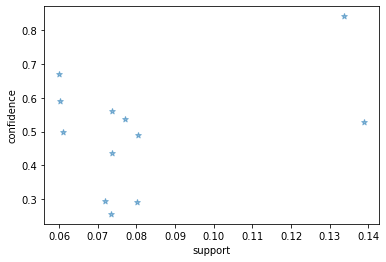

In [33]:
#here we try to build up a scatter plot to represent the diagram for confidence and support
import random
import matplotlib.pyplot as plt

support=rules['support']
confidence=rules['confidence']
 
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


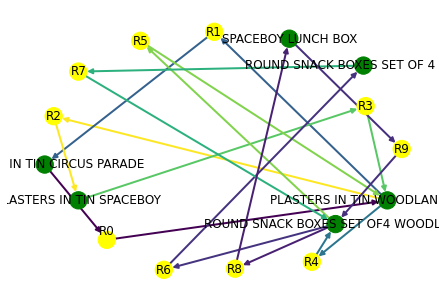

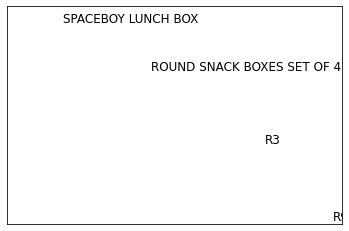

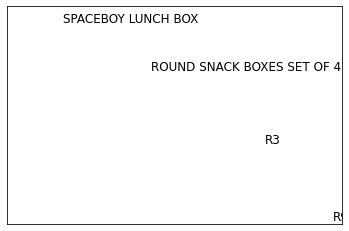

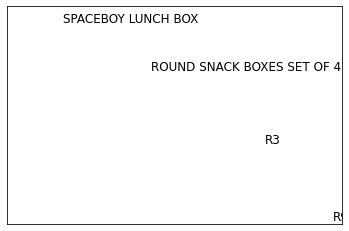

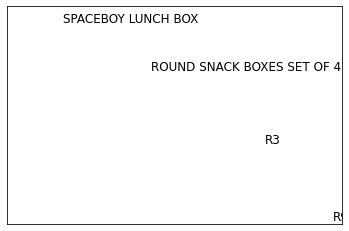

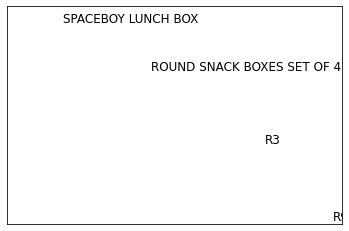

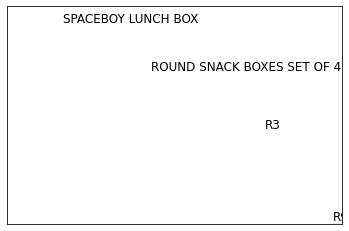

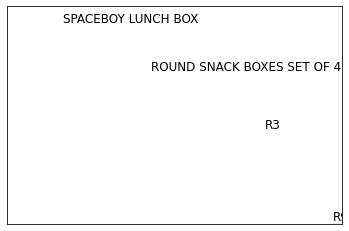

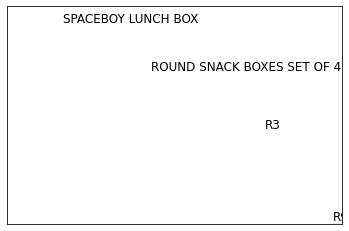

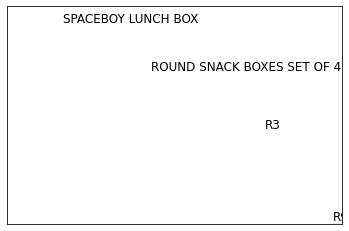

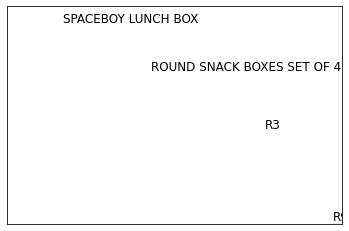

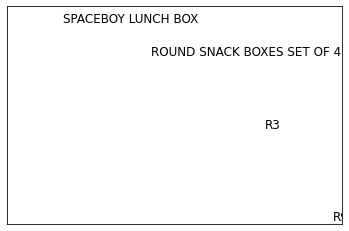

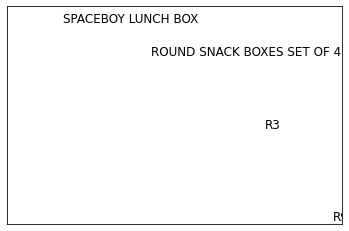

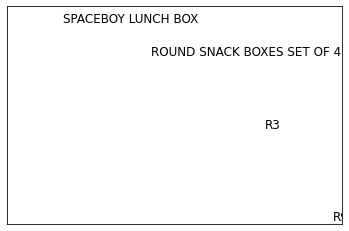

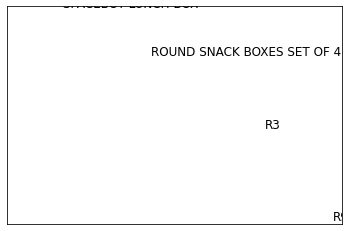

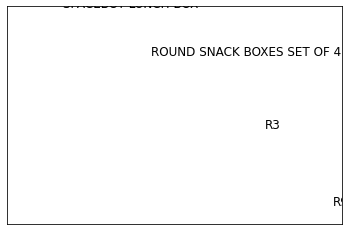

In [34]:
#we are here trying to present a seaborn visualization for support and confidence
support=rules['support']
confidence=rules['confidence']
 
import seaborn as sns1
 
for i in range (len(support)):
    support[i] = support[i] 
    confidence[i] = confidence[i] 
     
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')    
sns1.regplot(x=support, y=confidence, fit_reg=False)
 
plt.gcf().clear()
draw_graph (rules, 10)  

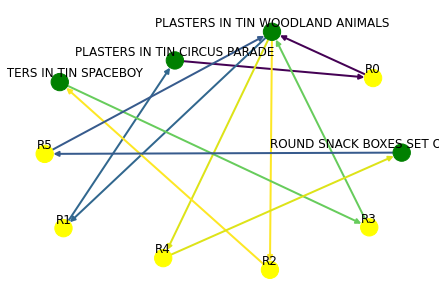

In [35]:
import numpy as np
 
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
  edges= G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos,node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()
 
     
draw_graph (rules_mlxtend, 6)   